# **Projeto Acidentes em Rodovias Federais**

##### Notebook Destinado a limpeza de dados

In [128]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


In [129]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [130]:
df20 = pd.read_csv("acidentes2020_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df21 = pd.read_csv("acidentes2021_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df22 = pd.read_csv("acidentes2022_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=';')
df23 = pd.read_csv("acidentes2023_todas_causas_tipos.csv", encoding='iso-8859-1', delimiter=";")
df = pd.concat([df20,df21, df22, df23], ignore_index=True)

In [131]:
print(df20.shape, end=' | ')
print(df21.shape, end=' | ')
print(df22.shape, end=' | ')
print(df23.shape, end=' | ')
print(df.shape)

(348047, 37) | (393521, 37) | (456521, 37) | (514799, 37) | (1712888, 37)


In [132]:
df.drop_duplicates(inplace=True)

In [133]:
df.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
1,260031.0,578475.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Feminino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
2,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
3,260031.0,578988.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO
4,260031.0,578987.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Sim,...,Masculino,0,0,1,0,"-11,77460203","-49,10744996",SPRF-TO,DEL02-TO,UOP02-DEL01-TO


In [134]:
df.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [135]:
df.loc[0][0:15]

id                                       260031.0
pesid                                    578475.0
data_inversa                           2020-01-01
dia_semana                           quarta-feira
horario                                  01:00:00
uf                                             TO
br                                          153.0
km                                          678,1
municipio                                  GURUPI
causa_principal                               Sim
causa_acidente                   Animais na Pista
ordem_tipo_acidente                             1
tipo_acidente             Atropelamento de Animal
classificacao_acidente        Com Vítimas Feridas
fase_dia                              Plena Noite
Name: 0, dtype: object

In [136]:
df.loc[0][15:]

sentido_via                              Crescente
condicao_metereologica                     Nublado
tipo_pista                                 Simples
tracado_via                                   Reta
uso_solo                                       Não
id_veiculo                                  464101
tipo_veiculo                             Automóvel
marca                     FIAT/SIENA ATTRACTIV 1.4
ano_fabricacao_veiculo                      2012.0
tipo_envolvido                            Condutor
estado_fisico                        Lesões Graves
idade                                         33.0
sexo                                      Feminino
ilesos                                           0
feridos_leves                                    0
feridos_graves                                   1
mortos                                           0
latitude                              -11,77460203
longitude                             -49,10744996
regional                       

Diversos erros nos dados podem ser encontrados, como formatação e colunas desnecessárias

#### **Excluindo colunas desnecessarias**

In [137]:
df.drop(['pesid', 'id_veiculo', 'marca', 'regional', 'uop', 'causa_principal'], axis=1, inplace=True)

In [138]:
print(df.shape)

(1712888, 31)


**Verificando se há valores nulos**

In [139]:
valores_vazios = df.isna().sum()
valores_vazios[valores_vazios > 0]

br                          5781
km                          5781
tipo_acidente                  1
ano_fabricacao_veiculo     94377
idade                     170294
delegacia                    813
dtype: int64

### **Tratando valores vazios**

Tipo Acidente

In [140]:
df['tipo_acidente'].value_counts()

tipo_acidente
Colisão traseira                   257322
Saída de leito carroçável          228765
Tombamento                         211941
Queda de ocupante de veículo       194487
Colisão transversal                139970
Colisão frontal                    120755
Colisão com objeto                 116167
Capotamento                        101757
Colisão lateral mesmo sentido       91558
Atropelamento de Pedestre           54696
Engavetamento                       42680
Colisão lateral sentido oposto      36557
Colisão lateral                     36178
Colisão com objeto estático         30527
Derramamento de carga               15616
Incêndio                            15027
Atropelamento de Animal             11427
Eventos atípicos                     4772
Colisão com objeto em movimento      1504
Danos eventuais                      1181
Name: count, dtype: int64

In [141]:
#Atribuindo a moda para o valor faltante
df.fillna({
    'tipo_acidente' : 'Colisão traseira'
}, inplace=True)

Coluna idade

In [142]:
# Dados da coluna idade(arredondando para não ficar em notação científica)
round(df['idade'].describe(), 2)

count    1542594.00
mean          39.15
std           38.66
min            0.00
25%           27.00
50%           37.00
75%           48.00
max         2022.00
Name: idade, dtype: float64

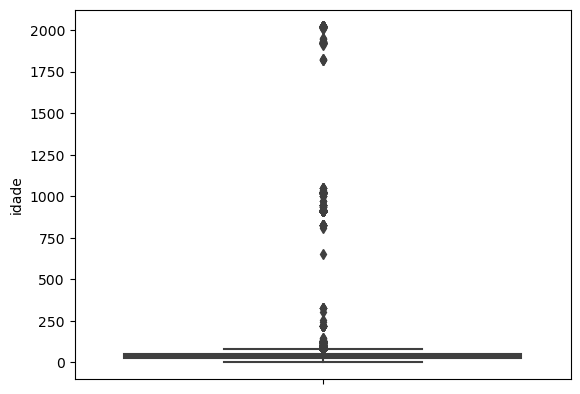

In [143]:
sns.boxplot(y='idade', data=df, orient="v")
plt.show()

Tratando os outliers da coluna idade

In [144]:
#Quantidade de valores acima de 100 anos
df.loc[df['idade'] > 100, 'idade'].shape[0]

1535

In [145]:
# Atribuindo o valor 37 (mediana), para as idades maiores que 100 anos
df.loc[df['idade'] > 100, 'idade'] = 37

In [146]:
# Verificando as mudanças
round(df['idade'].describe(), 2)

count    1542594.00
mean          38.20
std           15.13
min            0.00
25%           27.00
50%           37.00
75%           48.00
max          100.00
Name: idade, dtype: float64

In [147]:
# Acredito que o valor 0 possa representar recém-nascidos e crianças abaixo de 1 ano de idade
# Não necessariamente sendo valores incorretos
df.loc[df['idade'] == 0, 'idade'].count()

3092

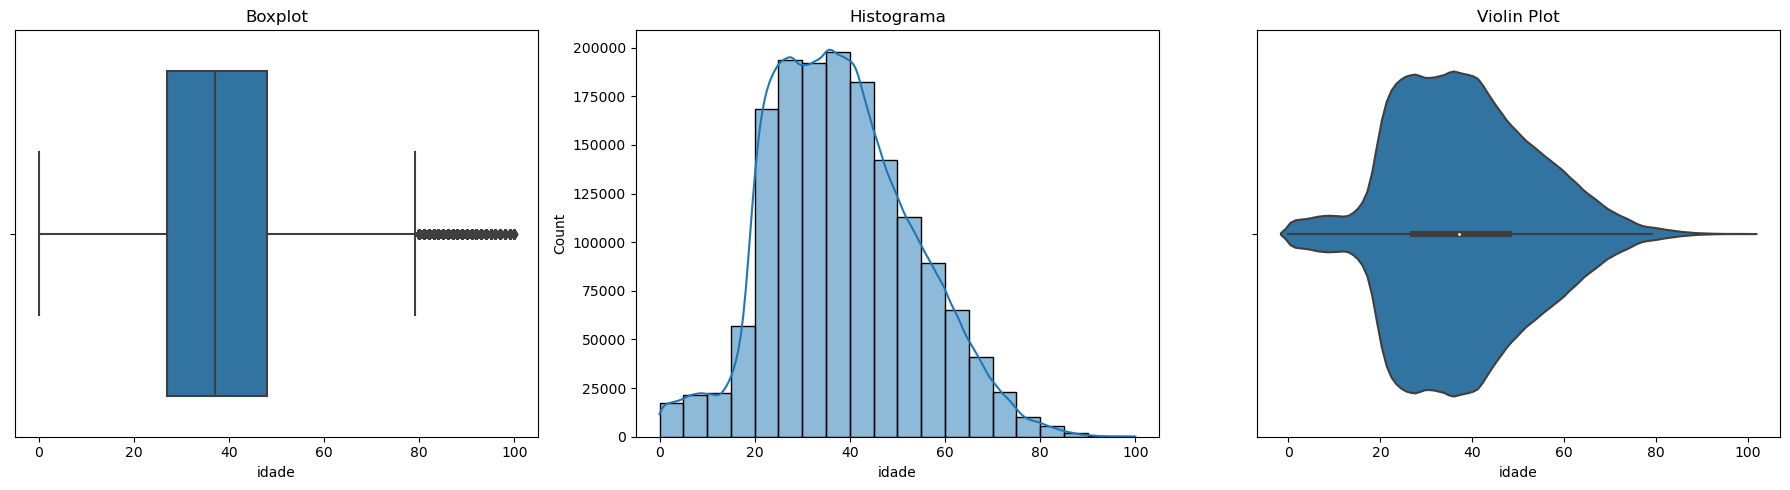

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot
sns.boxplot(data=df, x='idade', ax=axs[0])
axs[0].set_title('Boxplot')

# Histograma
sns.histplot(data=df, x='idade', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histograma')

# Gráfico de Violino
sns.violinplot(data=df, x='idade', ax=axs[2])
axs[2].set_title('Violin Plot')

# Ajustar layout
plt.tight_layout()
plt.show()

In [149]:
# Preenchendo os valores ausentes na coluna 'idade' com uma amostra gerada aleatoriamente,
# distribuída normalmente com base na média e no desvio padrão da coluna 'idade' existente

media_idade = df['idade'].mean()
desvio_padrao_idade = df['idade'].std()

valores_aleatorios = np.random.normal(media_idade, desvio_padrao_idade, df['idade'].isnull().sum()).astype(int)
while (valores_aleatorios <= 0).any():
    valores_aleatorios[valores_aleatorios <= 0] = np.random.normal(media_idade, desvio_padrao_idade, (valores_aleatorios <= 0).sum()).astype(int)

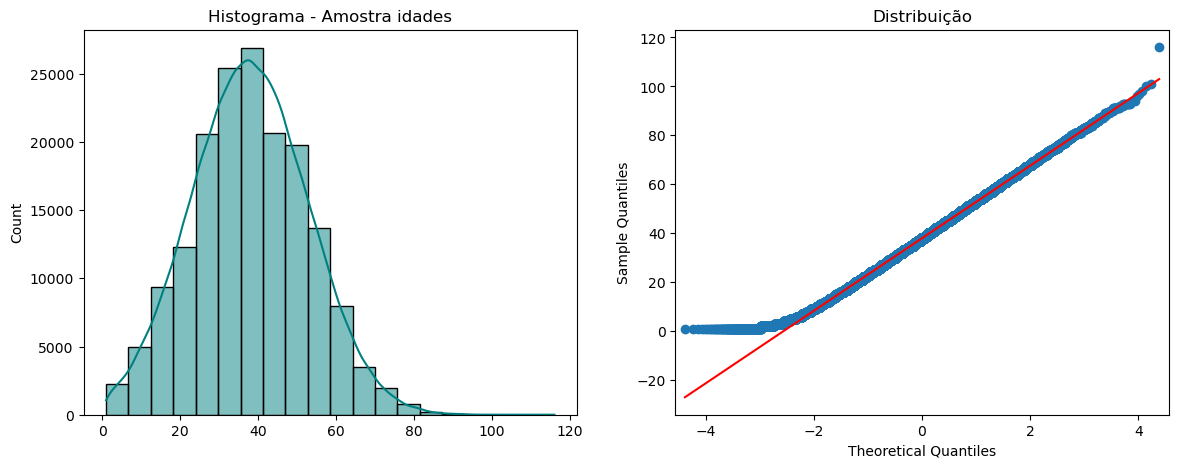

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(valores_aleatorios, bins=20, kde=True, color='teal', ax=axs[0])
axs[0].set_title("Histograma - Amostra idades")


sm.qqplot(valores_aleatorios, line ='q', ax=axs[1])
axs[1].set_title("Distribuição")

plt.show()

In [151]:
df.loc[df['idade'].isnull(), 'idade'] = valores_aleatorios

In [152]:
# Transformando o tipo de dado da coluna idade em número inteiro
df['idade'] = df['idade'].astype(int)

**Coluna BR**

In [153]:
df['br'].value_counts()

br
116.0    247596
101.0    222187
40.0      85861
381.0     81705
163.0     71025
          ...  
265.0        14
437.0        10
342.0         4
475.0         2
477.0         2
Name: count, Length: 122, dtype: int64

In [154]:
# Verificando os valores onde a 'br' está vazia
df.loc[df['br'].isna(), ['br', 'municipio']]

,br,municipio
559,NaN,SABARA
4491,NaN,RIO DE JANEIRO
4492,NaN,RIO DE JANEIRO
4493,NaN,RIO DE JANEIRO
6402,NaN,SANTO ANTONIO DO LEVERGER
...,...,...
1708538,NaN,ELDORADO DO SUL
1708539,NaN,ELDORADO DO SUL
1708540,NaN,ELDORADO DO SUL
1708541,NaN,ELDORADO DO SUL


In [155]:
# Criando uma função moda para encontrar a moda da 'br' com base no municipio
# Essa função é necessaria pois há valores nulos na coluna

def moda(coluna):
    moda = coluna.mode()
    if len(moda) > 0:
        return moda.iloc[0]
    else:
        return None

In [156]:
# Escolhendo as colunas e aplicando a função

moda_br_municipio = df.groupby('municipio')['br'].agg(moda)
moda_br_municipio

municipio
ABADIA DE GOIAS     60.0
ABADIANIA           60.0
ABARE              116.0
ABEL FIGUEIREDO    222.0
ABRE CAMPO         262.0
                   ...  
XAPURI             317.0
XAXIM              282.0
XEXEU              101.0
XINGUARA           155.0
ZE DOCA            316.0
Name: br, Length: 1985, dtype: float64

In [157]:
# Aplicando a função

df['br'] = df.apply(lambda row: moda_br_municipio[row['municipio']] if pd.isna(row['br']) else row['br'], axis=1)

In [158]:
df.loc[df['br'].isna(), 'municipio'].unique()

array(['GALIA', 'SAO JOAO DO PIAUI', 'AGUA AZUL DO NORTE', 'PEROLA',
       'PALOTINA', 'SANTA CRUZ DO RIO PARDO', 'CAPIVARI DO SUL',
       'RUBINEIA', 'LAVRAS DO SUL', 'BODOQUENA', 'ALMEIRIM', 'URUPES',
       'CORONEL FREITAS', 'BOCA DA MATA', 'TERESINA DE GOIAS', 'TUCUMA',
       'ARAPIRACA', 'FRANCO DA ROCHA', 'GARRAFAO DO NORTE', 'FARROUPILHA',
       'AMETISTA DO SUL', 'TRAMANDAI', 'PORTO NACIONAL',
       'SAO FELIX DO XINGU'], dtype=object)

ainda sobram valores faltantes, utilizarei a coluna 'uf' como base agora

In [159]:
moda_br_uf = df.groupby('uf')['br'].agg(moda)

In [160]:
df['br'] = df.apply(lambda row: moda_br_uf[row['uf']] if pd.isna(row['br']) else row['br'], axis=1)

In [161]:
df['br'].isna().sum()

0

In [162]:
df['br'] = df['br'].astype(int)

**Coluna KM**

In [163]:
df['km'].value_counts()

km
2        6249
1        6173
3        6110
5        5698
4        4803
         ... 
942,9       1
642,2       1
698,3       1
769,1       1
868,2       1
Name: count, Length: 9352, dtype: int64

In [164]:
# Retirando o ponto flutuante da coluna 'km'

df['km'] = df['km'].str.split(',').str[0]

In [165]:
quantidade_km_nan = df['km'].isna().sum()
quantidade_km_nan

5781

In [166]:
df['km'] = df['km'].fillna(-1).astype(int)
df['km'] = df['km'].astype(int)

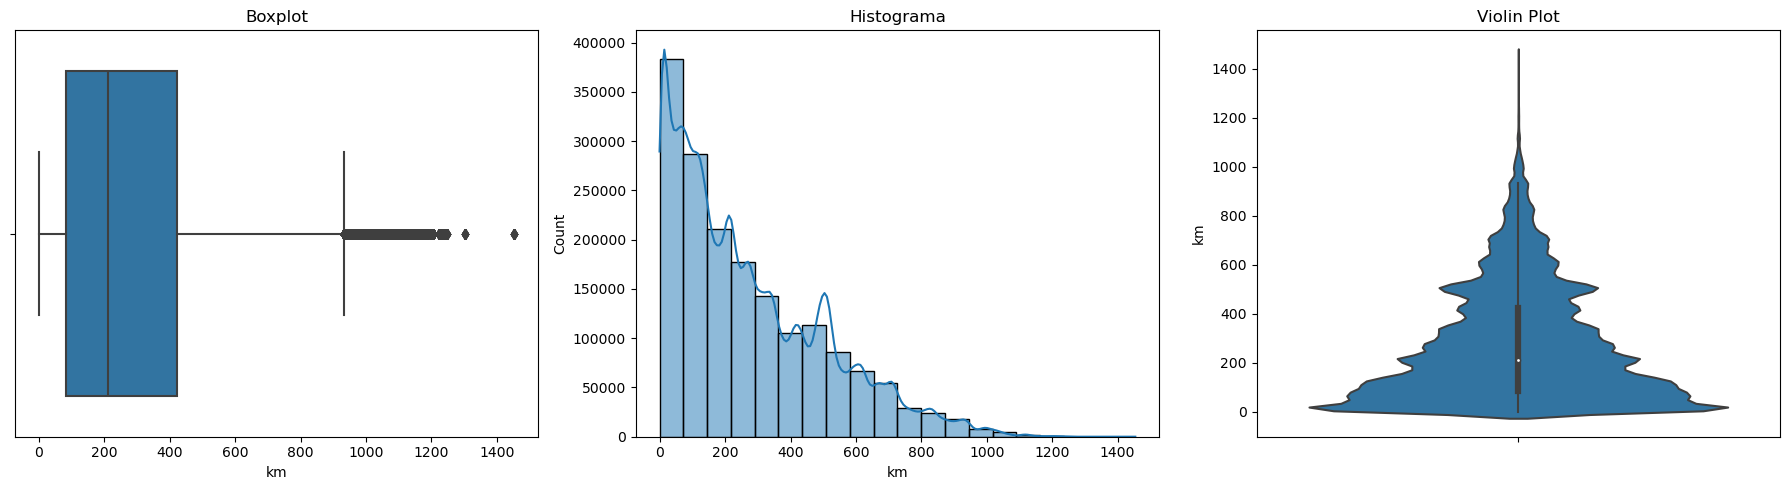

In [167]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='km', ax=axs[0])
axs[0].set_title('Boxplot')

sns.histplot(data=df, x='km', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histograma')

sns.violinplot(data=df, y='km', ax=axs[2], orient='v')
axs[2].set_title('Violin Plot')

plt.tight_layout()
plt.show()

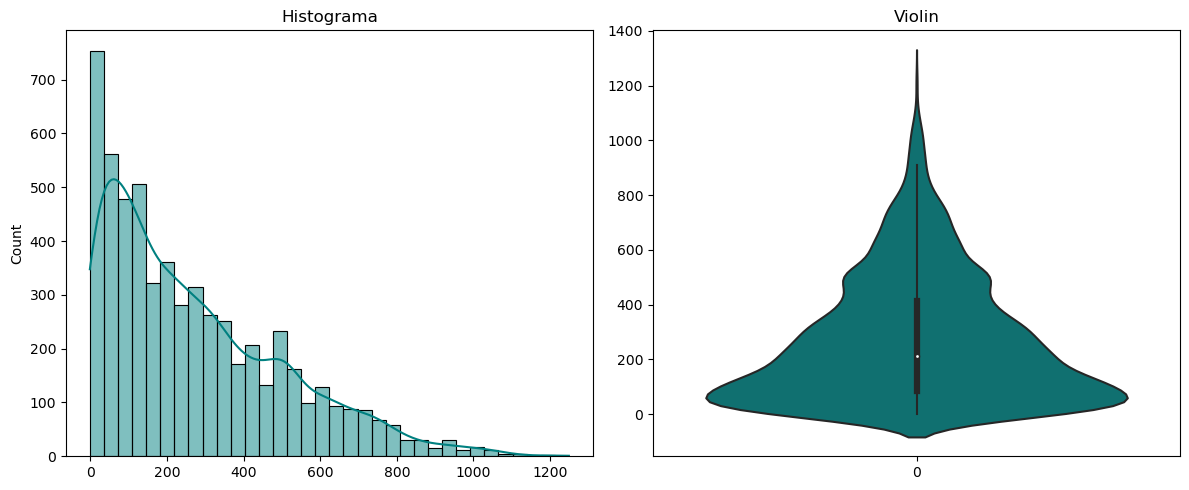

In [168]:
# Gerando uma amostra com base nos próprios dados da coluna km

amostra_km = np.random.choice(df['km'], size= quantidade_km_nan, replace=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(amostra_km, kde=True, color='teal', ax=axs[0])
axs[0].set_title('Histograma')

sns.violinplot(amostra_km, color='teal', ax=axs[1])
axs[1].set_title("Violin")

plt.tight_layout()
plt.show()

In [169]:
df.loc[df['km'] == -1, 'km'] = amostra_km

Ano de Fabricação

In [170]:
round(df['ano_fabricacao_veiculo'].describe(), 2)

count    1618511.00
mean        1923.22
std          411.81
min            0.00
25%         2007.00
50%         2012.00
75%         2017.00
max         2023.00
Name: ano_fabricacao_veiculo, dtype: float64

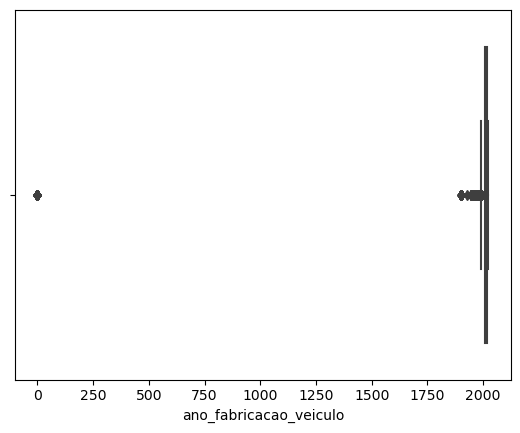

In [171]:
sns.boxplot(data=df, x='ano_fabricacao_veiculo')
plt.show()

Há presença de valores nulos, vazios e menores que 1900

In [172]:
df.loc[df['ano_fabricacao_veiculo'] <= 1950, 'ano_fabricacao_veiculo'].value_counts()

ano_fabricacao_veiculo
0.0       70931
1900.0      139
1946.0        8
1929.0        1
Name: count, dtype: int64

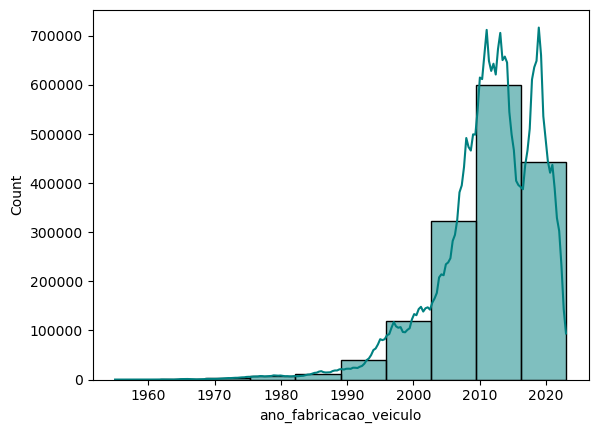

In [173]:
sns.histplot(data=df.loc[df['ano_fabricacao_veiculo'] >= 1950], x='ano_fabricacao_veiculo', bins=10, kde=True, color='teal')
plt.show()

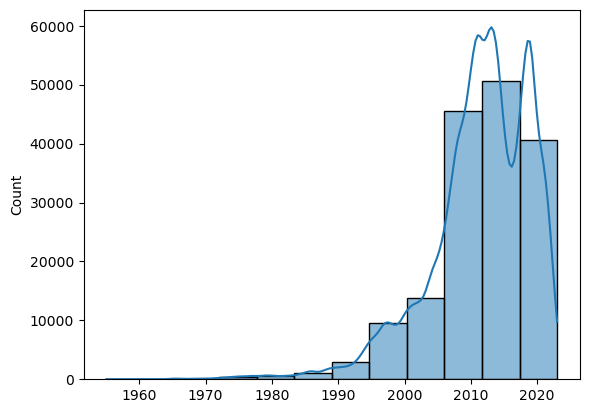

In [174]:
# Gerando uma amostra para a coluna ano_fabricacao_veiculo para os valores nulos e vazios

quantidade_fab0 = df.loc[df['ano_fabricacao_veiculo'] <= 1950].shape[0] + df['ano_fabricacao_veiculo'].isnull().sum()

df_filtrofab0 = df.loc[df['ano_fabricacao_veiculo'] > 1950, 'ano_fabricacao_veiculo']

amostra_fab = np.random.choice(df_filtrofab0, size=quantidade_fab0, replace=True)
sns.histplot(amostra_fab, bins=12, kde=True)
plt.show()

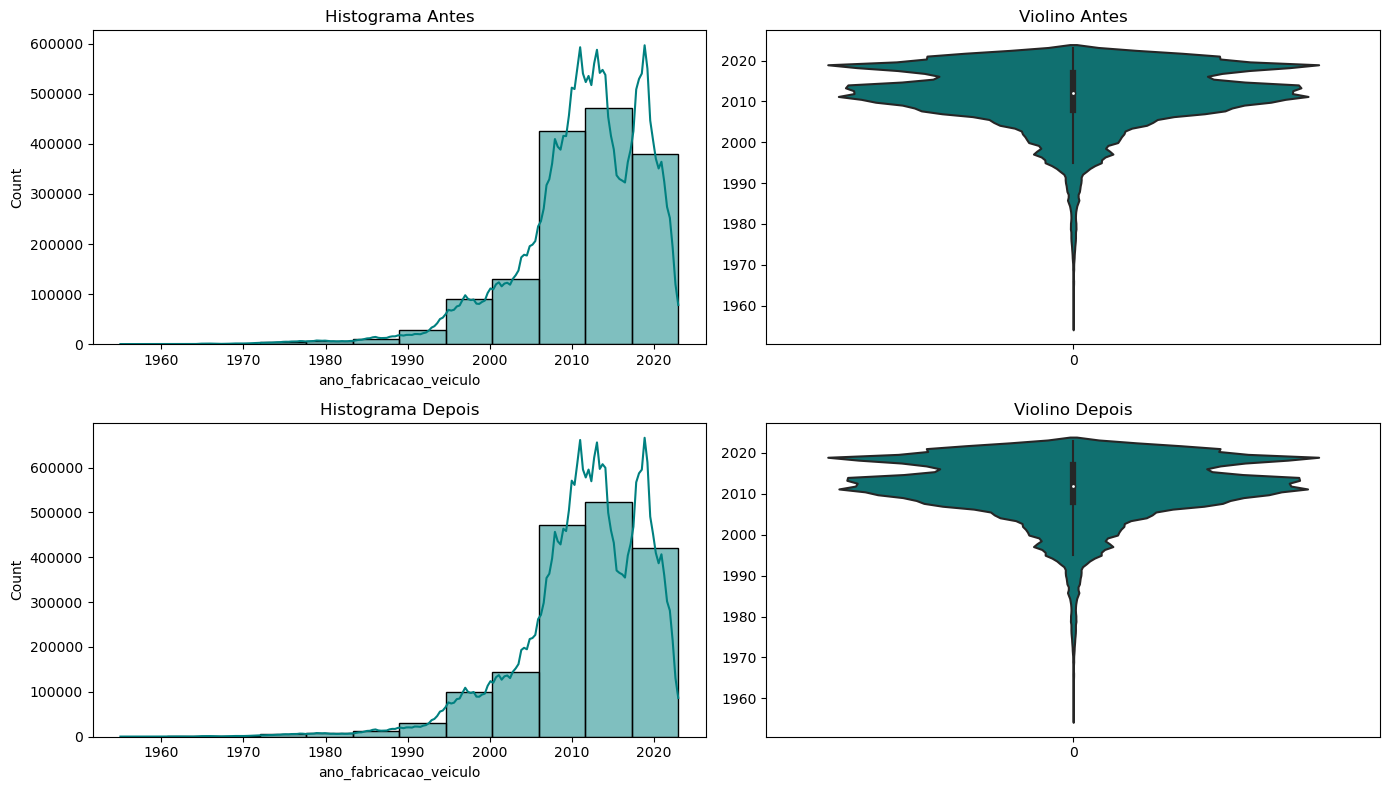

In [175]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

sns.histplot(df_filtrofab0, ax=axs[0, 0], bins=12, color='teal', kde=True)
axs[0, 0].set_title('Histograma Antes')

sns.violinplot(df_filtrofab0, ax=axs[0, 1], color='teal')
axs[0, 1].set_title('Violino Antes')

# Substituindo os dados inconsistentes pela amostra gerada
df.loc[(df['ano_fabricacao_veiculo'].isna()) | (df['ano_fabricacao_veiculo'] <= 1950), 'ano_fabricacao_veiculo'] = amostra_fab

anofab = df['ano_fabricacao_veiculo']

sns.histplot(anofab, ax=axs[1, 0], bins=12, color='teal', kde=True)
axs[1, 0].set_title('Histograma Depois')

sns.violinplot(anofab, ax=axs[1, 1], color='teal')
axs[1, 1].set_title('Violino Depois')

plt.tight_layout()
plt.show()

In [176]:
df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].astype(int)

Delegacia

In [177]:
df['delegacia'].value_counts()

delegacia
DEL01-PR    72972
DEL01-MG    45984
DEL01-SC    35572
DEL04-SC    35195
DEL01-SP    30891
            ...  
DEL07-SP     2141
DEL12-RS     2026
DEL02-PI     1708
SEOP-RR        67
SEOP-AP        54
Name: count, Length: 153, dtype: int64

In [178]:
moda_delagacia_municipio = df.groupby('municipio')['delegacia'].agg(moda)
moda_delagacia_uf = df.groupby('uf')['delegacia'].agg(moda)

In [179]:
df['delegacia'] = df.apply(lambda row: moda_delagacia_municipio[row['municipio']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)
df['delegacia'] = df.apply(lambda row: moda_delagacia_uf[row['uf']] if pd.isna(row['delegacia']) else row['delegacia'], axis=1)

Foi observado anteriormente tipos de dados incorretos

In [180]:
df.dtypes[:20]

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                          int32
km                          int32
municipio                  object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo      int32
dtype: object

In [181]:
df.dtypes[20:]

tipo_envolvido    object
estado_fisico     object
idade              int32
sexo              object
ilesos             int64
feridos_leves      int64
feridos_graves     int64
mortos             int64
latitude          object
longitude         object
delegacia         object
dtype: object

O tipo object significa que pode haver dois ou mais tipos de dados misturados

***Formatando os tipos de dados***

**Coluna id**

In [182]:
df['id'].value_counts()

id
368980.0    2100
513470.0    1512
508740.0     990
404997.0     980
543737.0     900
            ... 
510016.0       1
280674.0       1
510018.0       1
510021.0       1
475115.0       1
Name: count, Length: 260480, dtype: int64

In [183]:
ids_mais_de_100 = df['id'].value_counts()[df['id'].value_counts() > 100].index
df[df['id'].isin(ids_mais_de_100)][:15]

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,...,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia
1576,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,41,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1577,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,22,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1578,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,43,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1579,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,27,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1580,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,32,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1581,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,24,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1582,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,22,Masculino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1583,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Ileso,32,Masculino,1,0,0,0,"-19,95624622","-44,09843445",DEL01-MG
1584,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,63,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG
1585,260421.0,2020-01-02,quinta-feira,19:00:00,MG,381,484,BETIM,Defeito na Via,1,...,Lesões Leves,37,Feminino,0,1,0,0,"-19,95624622","-44,09843445",DEL01-MG


In [184]:
# Transformando o id em string e retirando o ponto flutuante

df['id'] = df['id'].astype(str)
df['id'] = df['id'].str.replace('.0', '')

# Anteriormente foi possivel observar id se repetindo mais de 100x
# o que não faz sentido, visto que é muito dificil um acidente afetar 200 pessoas diretamente

# Utilizarei os parâmetros idade, id e sexo para remover duplicações nos dados, como a distribuição das idades é proximo de uma normal
# a probabilidade de  um pessoas da mesma idade estiverem envolvidas

df = df.drop_duplicates(subset=['id', 'idade', 'sexo'])

In [185]:
# Verificando as alterações
df['id'].value_counts()

id
508740    136
568579    121
481625    115
404997    114
413435    112
         ... 
444748      1
444746      1
444743      1
444741      1
442781      1
Name: count, Length: 260480, dtype: int64

**Coluna data_inversa**

In [186]:
df['data_inversa'].value_counts()

data_inversa
2023-12-23    1062
2023-06-11     958
2023-07-23     940
2023-12-15     882
2020-10-10     880
              ... 
2020-03-28     209
2020-03-30     201
2020-03-25     181
2020-03-26     175
2020-03-23     170
Name: count, Length: 1461, dtype: int64

In [187]:
# Transformando em date_time
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

In [188]:
df['horario'] = pd.to_datetime(df['horario'], format='%H:%M:%S')

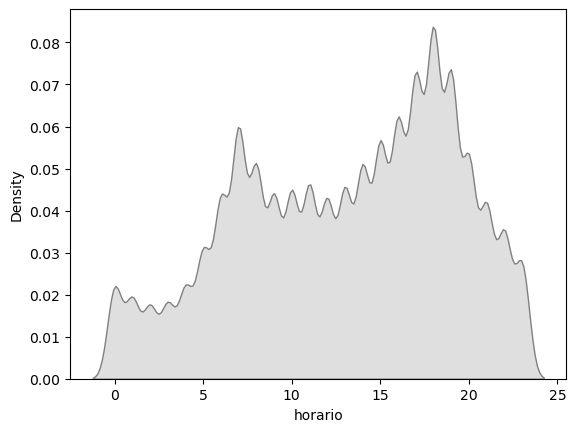

In [189]:
# Visualizando a distribuição dos valores pelas horas

sns.kdeplot(df['horario'].dt.hour, fill=True, color='gray')
plt.show()

In [190]:
# Observando o formato dos dados
df['horario'].value_counts()

horario
1900-01-01 19:00:00    10480
1900-01-01 18:30:00    10004
1900-01-01 18:00:00     9873
1900-01-01 17:00:00     8505
1900-01-01 17:30:00     8268
                       ...  
1900-01-01 02:32:00        3
1900-01-01 02:36:00        3
1900-01-01 01:54:00        2
1900-01-01 01:19:00        1
1900-01-01 01:17:00        1
Name: count, Length: 1438, dtype: int64

In [191]:
# Criando a coluna data_completa para juntar o horario e a data

df['data_completa'] = df['data_inversa'] + pd.to_timedelta(df['horario'].dt.strftime('%H:%M:%S'))
df['data_completa'].value_counts()

data_completa
2023-03-05 12:35:00    136
2023-12-17 18:15:00    121
2021-11-19 15:20:00    119
2021-12-31 04:00:00    118
2022-10-19 18:50:00    115
                      ... 
2022-04-10 20:30:00      1
2023-03-16 06:50:00      1
2022-11-15 16:25:00      1
2023-03-14 20:35:00      1
2022-01-17 05:05:00      1
Name: count, Length: 176821, dtype: int64

In [192]:
# Excluindo data_inversa e horario para ficar apenas a coluna com a data completa

df.drop(['data_inversa', 'horario'], axis=1, inplace=True)

**Coluna uf**

In [193]:
df['uf'].value_counts()

uf
MG    90850
PR    77538
SC    74532
RS    50545
RJ    47299
SP    47064
BA    39313
GO    35346
PE    30153
ES    23505
MT    23168
MS    18804
RO    17173
PB    17034
CE    16096
MA    14081
PI    13882
PA    13725
RN    13334
DF    10569
TO     7179
AL     5978
SE     5652
AC     2779
RR     2714
AP     2016
AM     1758
Name: count, dtype: int64

In [194]:
# Nenhuma anormalidade nos dados da coluna uf

df['uf'] = df['uf'].astype(str)

In [195]:
df['dia_semana'].value_counts()

dia_semana
domingo          123354
sábado           119866
sexta-feira      109041
segunda-feira     93446
quinta-feira      88247
quarta-feira      85439
terça-feira       82694
Name: count, dtype: int64

In [196]:
df['dia_semana'] = df['dia_semana'].astype(str)

**Coluna BR**

In [197]:
# Convertendo para string

df['br'] = 'BR-' + df['br'].astype(int).astype(str)

In [198]:
df['br'].unique()

array(['BR-153', 'BR-116', 'BR-101', 'BR-364', 'BR-319', 'BR-369',
       'BR-104', 'BR-290', 'BR-470', 'BR-282', 'BR-156', 'BR-60', 'BR-20',
       'BR-324', 'BR-373', 'BR-407', 'BR-381', 'BR-316', 'BR-262',
       'BR-40', 'BR-376', 'BR-392', 'BR-163', 'BR-459', 'BR-277',
       'BR-308', 'BR-10', 'BR-230', 'BR-222', 'BR-232', 'BR-50', 'BR-356',
       'BR-70', 'BR-493', 'BR-393', 'BR-365', 'BR-280', 'BR-408',
       'BR-135', 'BR-343', 'BR-158', 'BR-467', 'BR-361', 'BR-80',
       'BR-414', 'BR-447', 'BR-242', 'BR-304', 'BR-259', 'BR-251',
       'BR-110', 'BR-386', 'BR-210', 'BR-367', 'BR-146', 'BR-235',
       'BR-487', 'BR-293', 'BR-174', 'BR-405', 'BR-465', 'BR-476',
       'BR-226', 'BR-452', 'BR-330', 'BR-428', 'BR-482', 'BR-420',
       'BR-472', 'BR-480', 'BR-401', 'BR-354', 'BR-469', 'BR-406',
       'BR-423', 'BR-285', 'BR-424', 'BR-267', 'BR-427', 'BR-412',
       'BR-471', 'BR-463', 'BR-429', 'BR-287', 'BR-272', 'BR-155',
       'BR-485', 'BR-415', 'BR-448', 'BR-418', 'B

**Coluna municipio**

In [199]:
df['municipio'].value_counts()

municipio
BRASILIA           10569
CURITIBA            9111
GUARULHOS           7992
SAO JOSE            6518
DUQUE DE CAXIAS     6081
                   ...  
IPANGUACU              1
MATOES                 1
TELEMACO BORBA         1
CHA GRANDE             1
DARIO MEIRA            1
Name: count, Length: 1985, dtype: int64

**Coluna Causa_acidente**

In [200]:
df['causa_acidente'].value_counts()

causa_acidente
Reação tardia ou ineficiente do condutor                                         67776
Velocidade Incompatível                                                          62658
Ausência de reação do condutor                                                   56539
Falta de Atenção à Condução                                                      56081
Acessar a via sem observar a presença dos outros veículos                        44548
                                                                                 ...  
Transitar na calçada                                                                75
Semáforo com defeito                                                                61
Condutor não acionou o farol baixo durante o dia em rodovias de pista simples       40
Obstrução Via tentativa Assalto                                                     36
Pedestre - Ingestão de álcool/ substâncias psicoativas                              17
Name: count, Length: 92, dty

**Ordem Tipo Acidente**

In [201]:
# Posteriormente irei agrupar e sumarizar os dados com base no id e deletar essa coluna

df['ordem_tipo_acidente'].describe()

count    702087.000000
mean          1.410426
std           0.734750
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          15.000000
Name: ordem_tipo_acidente, dtype: float64

**Coluna Classificação Acidente**

In [202]:
df['classificacao_acidente'].value_counts()

classificacao_acidente
Com Vítimas Feridas    522857
Sem Vítimas            102668
Com Vítimas Fatais      76562
Name: count, dtype: int64

**Coluna Fase Dia**

In [203]:
df['fase_dia'].value_counts()

fase_dia
Pleno dia      378839
Plena Noite    249182
Anoitecer       41191
Amanhecer       32875
Name: count, dtype: int64

**Coluna Sentido Via**

In [204]:
df['sentido_via'].value_counts()

sentido_via
Crescente        375433
Decrescente      324512
Não Informado      2142
Name: count, dtype: int64

In [205]:
# Atribuindo a moda para o valor 'Não Informado'

df.loc[df['sentido_via'] == 'Não Informado', 'sentido_via'] = 'Crescente'

In [206]:
df['condicao_metereologica'].value_counts()

condicao_metereologica
Céu Claro           430310
Nublado             112353
Chuva                73239
Sol                  44958
Garoa/Chuvisco       24542
Ignorado              9440
Nevoeiro/Neblina      5887
Vento                 1283
Neve                    39
Granizo                 36
Name: count, dtype: int64

In [207]:
# Atribuindo a moda para o valor 'Ignorado'

df.loc[df['condicao_metereologica'] == 'Ignorado', 'condicao_metereologica'] = 'Céu Claro'

In [208]:
df['tipo_pista'].value_counts()

tipo_pista
Simples     365080
Dupla       276664
Múltipla     60343
Name: count, dtype: int64

In [209]:
df['tracado_via'].value_counts()[:20]

tracado_via
Reta                              418303
Curva                              87752
Interseção de Vias                 26922
Declive                            18234
Aclive                             15152
Reta;Declive                       13323
Rotatória                          10901
Reta;Aclive                        10864
Aclive;Reta                         9577
Curva;Declive                       9209
Declive;Reta                        9182
Retorno Regulamentado               6886
Declive;Curva                       6126
Reta;Interseção de Vias             5849
Curva;Aclive                        4702
Interseção de Vias;Reta             4322
Viaduto                             4083
Ponte                               3372
Aclive;Curva                        3247
Reta;Em Obras                       2684
Name: count, dtype: int64

In [210]:
# Verificando com mais detalhes os valores, pois achei estranho a presença do ';'

df['tracado_via'].unique()[:20]

array(['Reta', 'Curva', 'Reta;Interseção de Vias       ',
       'Declive;Curva                 ', 'Viaduto', 'Interseção de Vias',
       'Aclive;Reta                   ', 'Rotatória',
       'Curva;Declive                 ', 'Declive',
       'Reta;Declive                  ', 'Aclive',
       'Curva;Aclive                  ', 'Retorno Regulamentado',
       'Aclive;Curva                  ', 'Ponte;Reta;Declive            ',
       'Aclive;Viaduto;Curva          ', 'Declive;Reta                  ',
       'Viaduto;Reta;Interseção de Via', 'Reta;Aclive                   '],
      dtype=object)

In [211]:
# Separando os valores onde há ';' e pegando o primeiro valor do split com [0]

df['tracado_via'] = df['tracado_via'].str.split(';').str[0]

In [212]:
# Visualizando as alterações

df['tracado_via'].unique()

array(['Reta', 'Curva', 'Declive', 'Viaduto', 'Interseção de Vias',
       'Aclive', 'Rotatória', 'Retorno Regulamentado', 'Ponte',
       'Em Obras', 'Desvio Temporário', 'Túnel'], dtype=object)

**Coluna uso solo (Urbano ou Rural)**

In [213]:
df['uso_solo'].value_counts()

uso_solo
Não    397926
Sim    304161
Name: count, dtype: int64

In [214]:
# Substituindo o valor 'sim' por urbano e 'Não' por rural
# Essas informações estão disponíveis no dicionário de dados da PRF

df['uso_solo'] = df['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [215]:
df['uso_solo'] = df['uso_solo'].astype(str)

**Coluna tipo veiculo**

In [216]:
df['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            279956
Motocicleta          124494
Caminhonete           59463
Não se aplica         53854
Caminhão-trator       52336
Caminhão              47895
Ônibus                23161
Motoneta              14130
Utilitário             9460
Bicicleta              8854
Camioneta              8410
Não Informado          8366
Micro-ônibus           4831
Outros                 3407
Ciclomotor             1626
Semireboque             775
Carroça-charrete        366
Trator de rodas         323
Reboque                 193
Triciclo                 66
Carro de mão             49
Trator misto             21
Trem-bonde               19
Trator de esteira        16
Quadriciclo               9
Chassi-plataforma         7
Name: count, dtype: int64

agrupando em categorias mais abrangentes


In [217]:
df['tipo_veiculo'] = df['tipo_veiculo'].replace(
    {'Motoneta': 'Motocicleta', 'Caminhão-trator': 'Caminhão', 'Camioneta': 'Camioneta/Caminhonete',
     'Caminhonete': 'Camioneta/Caminhonete', 'Micro-ônibus': 'Ônibus',
     'Trator de rodas': 'Trator', 'Trator misto': 'Trator', 'Trator de esteira': 'Trator',
     'Chassi-plataforma': 'Caminhão', 'Semireboque': 'Reboque'})

Investigando os valores onde o tipo de veiculo é Não Informado, Não se aplica, Utilitário
Utilizando o tipo de acidente como base

In [218]:
df.loc[df['tipo_veiculo'] == 'Não Informado', ['tipo_acidente']].value_counts()

tipo_acidente                 
Colisão traseira                  1585
Saída de leito carroçável         1138
Colisão transversal                952
Colisão com objeto                 723
Capotamento                        664
Colisão lateral mesmo sentido      590
Colisão frontal                    585
Engavetamento                      485
Tombamento                         433
Queda de ocupante de veículo       390
Incêndio                           250
Colisão lateral sentido oposto     226
Atropelamento de Pedestre          197
Atropelamento de Animal             99
Eventos atípicos                    37
Derramamento de carga               11
Colisão com objeto estático          1
Name: count, dtype: int64

In [219]:
df.loc[df['tipo_veiculo'] == 'Não se aplica', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          15185
Queda de ocupante de veículo        6288
Tombamento                          6166
Saída de leito carroçável           5362
Colisão traseira                    3993
Colisão com objeto                  3042
Colisão transversal                 3038
Colisão frontal                     2932
Capotamento                         2158
Colisão lateral mesmo sentido       1697
Colisão com objeto estático          837
Colisão lateral                      799
Colisão lateral sentido oposto       577
Derramamento de carga                520
Incêndio                             316
Atropelamento de Animal              313
Engavetamento                        263
Eventos atípicos                     245
Danos eventuais                       65
Colisão com objeto em movimento       58
Name: count, dtype: int64

In [220]:
df.loc[df['tipo_veiculo'] == 'Utilitário', ['tipo_acidente']].value_counts()

tipo_acidente                  
Colisão traseira                   1863
Saída de leito carroçável          1246
Colisão transversal                1037
Capotamento                         752
Colisão com objeto                  736
Colisão lateral mesmo sentido       687
Colisão frontal                     671
Engavetamento                       467
Tombamento                          465
Queda de ocupante de veículo        328
Colisão lateral sentido oposto      220
Colisão com objeto estático         218
Atropelamento de Pedestre           207
Colisão lateral                     186
Atropelamento de Animal             157
Incêndio                            107
Eventos atípicos                     56
Danos eventuais                      28
Derramamento de carga                25
Colisão com objeto em movimento       4
Name: count, dtype: int64

In [221]:
df.loc[df['tipo_veiculo'] == 'Outros', ['tipo_acidente']].value_counts()

tipo_acidente                  
Atropelamento de Pedestre          1009
Colisão traseira                    568
Queda de ocupante de veículo        503
Tombamento                          401
Colisão lateral mesmo sentido       142
Saída de leito carroçável           138
Colisão com objeto                  119
Colisão frontal                     118
Colisão transversal                 117
Colisão lateral                     108
Capotamento                          37
Colisão lateral sentido oposto       34
Engavetamento                        25
Eventos atípicos                     24
Colisão com objeto estático          23
Atropelamento de Animal              12
Derramamento de carga                 8
Incêndio                              8
Colisão com objeto em movimento       7
Danos eventuais                       6
Name: count, dtype: int64

In [222]:
# Atribuindo o tipo de veiculo como Pedestre para os acidente que a o tipo foi Atropelamento

filtro = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não informado', 'Outros']) & (df['tipo_acidente'] == 'Atropelamento de Pedestre')]
df.loc[filtro.index, 'tipo_veiculo'] = 'Pedestre'

Gerando uma amostra com base no dados para substituir as inconsistências

In [223]:
tamanho_veiculos_aleatorios = df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'].shape[0]
veiculos_aleatorios = np.random.choice(df['tipo_veiculo'], size=tamanho_veiculos_aleatorios, replace=True)

while (veiculos_aleatorios == 'Utilitário').any() or (veiculos_aleatorios == 'Não se aplica').any() or (veiculos_aleatorios == 'Não Informado').any() or (veiculos_aleatorios == 'Outros').any() or (veiculos_aleatorios == 'Pedestre').any():
    indices = np.where((veiculos_aleatorios == 'Utilitário') | (veiculos_aleatorios == 'Não se aplica') | (veiculos_aleatorios == 'Não Informado') | (veiculos_aleatorios == 'Outros') | (veiculos_aleatorios == 'Pedestre'))
    veiculos_aleatorios[indices] = np.random.choice(df['tipo_veiculo'], size=len(indices))
pd.DataFrame(veiculos_aleatorios).value_counts()

Automóvel                29667
Motocicleta              11694
Caminhão                  8319
Camioneta/Caminhonete     5575
Ônibus                    2387
Bicicleta                  755
Ciclomotor                 137
Reboque                     75
Trator                      33
Carroça-charrete            28
Triciclo                     6
Trem-bonde                   5
Carro de mão                 4
Quadriciclo                  1
Name: count, dtype: int64

In [224]:
# Substituindo com base na amostra

df.loc[df['tipo_veiculo'].isin(['Utilitário', 'Não se aplica', 'Não Informado', 'Outros']), 'tipo_veiculo'] = veiculos_aleatorios

In [225]:
df['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor         474474
Passageiro       173759
Testemunha        39012
Pedestre          14693
Cavaleiro           148
Não Informado         1
Name: count, dtype: int64

In [226]:
# Atribuindo a moda para o valor 'Não Informado'

df.loc[df['tipo_envolvido'] == 'Não Informado', 'tipo_envolvido'] = 'Condutor'

In [227]:
df.loc[(df['tipo_envolvido'] == 'Testemunha')]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
58,260046,quarta-feira,SC,BR-282,509,XANXERE,Animais na Pista,1,Saída de leito carroçável,Com Vítimas Feridas,...,29,Não Informado,0,0,0,0,"-26,89436315","-52,4613905",DEL07-SC,2020-01-01 02:15:00
164,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,31,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
327,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,1,Saída de leito carroçável,Com Vítimas Feridas,...,37,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
328,260139,quarta-feira,MT,BR-163,729,SORRISO,Velocidade Incompatível,2,Capotamento,Com Vítimas Feridas,...,57,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
329,260139,quarta-feira,MT,BR-163,729,SORRISO,Fenômenos da Natureza,1,Saída de leito carroçável,Com Vítimas Feridas,...,69,Não Informado,0,0,0,0,"-12,84559402","-55,82671994",DEL06-MT,2020-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712117,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,49,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712118,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,32,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712119,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,40,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00
1712120,582543,quarta-feira,SC,BR-282,309,VARGEM,Velocidade Incompatível,2,Tombamento,Com Vítimas Feridas,...,63,Não Informado,0,0,0,0,"-27,48248988","-50,98212004",DEL07-SC,2023-07-05 18:50:00


In [228]:
# É possivel observar que todas as testemunhas não possuem sexos e não estão envolvidas de fato no acidente
# Cavaleiro e a pessoa que estava andando com animais

df.loc[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].shape[0]

39012

In [229]:
df = df.drop(df[(df['tipo_envolvido'] == 'Testemunha') & (df['sexo'] == 'Não Informado')].index)

**Coluna estado fisico**

In [230]:
df['estado_fisico'].value_counts()

estado_fisico
Ileso            269034
Lesões Leves     225188
Lesões Graves     74315
Não Informado     71452
Óbito             23086
Name: count, dtype: int64

 ***Investigando os valores 'Não Informado'***

In [231]:
df.loc[df['estado_fisico'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,40,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,16,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,59,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,29,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,45,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712835,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,34,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,46,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,51,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,21,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [232]:
# Atribuindo o valor 'Ileso' para os acidentes onde não houveram vítimas

df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Sem Vítimas'), 'estado_fisico'] = 'Ileso'

Filtrando e observando os dados onde o estado fisico é não informado e a classificação é com vítimas fatais

In [233]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), ['id', 'estado_fisico','tipo_acidente', 'classificacao_acidente', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]

,id,estado_fisico,tipo_acidente,classificacao_acidente,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
599,260213,Não Informado,Tombamento,Com Vítimas Fatais,46,Não Informado,0,0,0,0
601,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,45,Não Informado,0,0,0,0
603,260213,Não Informado,Tombamento,Com Vítimas Fatais,47,Não Informado,0,0,0,0
605,260213,Não Informado,Saída de leito carroçável,Com Vítimas Fatais,19,Não Informado,0,0,0,0
2688,260652,Não Informado,Colisão frontal,Com Vítimas Fatais,30,Não Informado,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1712575,586160,Não Informado,Tombamento,Com Vítimas Fatais,37,Não Informado,0,0,0,0
1712577,586160,Não Informado,Colisão lateral sentido oposto,Com Vítimas Fatais,28,Não Informado,0,0,0,0
1712586,586507,Não Informado,Atropelamento de Pedestre,Com Vítimas Fatais,34,Não Informado,0,0,0,0
1712873,589229,Não Informado,Colisão lateral mesmo sentido,Com Vítimas Fatais,21,Não Informado,0,0,0,0


Criando uma amostra referente ao filtro anterior

In [234]:
# Não necessariamente estar envolvido em acidente com mortes significa que todos os envolvidos morreram,
# Porém a probabilidade do acidente ser mais violento é alta
# Utilizei uma probabilidade de 40% para ser óbito, 35% para Lesões graves e 25% para lesões leves

tamanho = df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais')].shape[0]
probabilidades = [0.65, 0.25, 0.1]
estados_fisicos = np.random.choice(['Óbito', 'Lesões Graves', 'Lesões Leves'], size=tamanho, p=probabilidades)

In [235]:
df.loc[(df['estado_fisico'] == 'Não Informado') & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'estado_fisico'] = estados_fisicos

In [236]:
# Para o restante dos dados que não estavam presentes em nenhum dos filtros anteriores

tamanho = df.loc[df['estado_fisico'] == 'Não Informado'].shape[0]
probabilidades = [0.5, 0.3, 0.2]
estados_fisicos2 = np.random.choice(['Lesões Leves', 'Ileso', 'Lesões Graves'], size=tamanho, p=probabilidades)

In [237]:
df.loc[df['estado_fisico'] == 'Não Informado', 'estado_fisico'] = estados_fisicos2

In [238]:
# Verificando a mudança

df['estado_fisico'].value_counts()

estado_fisico
Ileso            303198
Lesões Leves     245753
Lesões Graves     84656
Óbito             29468
Name: count, dtype: int64

**Coluna sexo**

In [239]:
df['sexo'].value_counts()

sexo
Masculino        443983
Feminino         143214
Não Informado     71452
Ignorado           4426
Name: count, dtype: int64

***Explorando os dados com sexo 'Não Informado' e 'Ignorado'***

In [240]:
df.loc[df['sexo'] == 'Não Informado']

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,40,Não Informado,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,16,Não Informado,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,59,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,29,Não Informado,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,45,Não Informado,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712835,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,34,Não Informado,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,46,Não Informado,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,51,Não Informado,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,21,Não Informado,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [241]:
df.loc[df['sexo'] == 'Ignorado'][:5]

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
10,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Ingestão de Álcool,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,33,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
12,260036,quarta-feira,RJ,BR-116,178,NOVA IGUACU,Falta de Atenção do Pedestre,1,Atropelamento de Pedestre,Com Vítimas Fatais,...,62,Ignorado,1,0,0,0,"-22,75223028","-43,4379103",DEL01-RJ,2020-01-01 01:00:00
231,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,2,Colisão com objeto estático,Com Vítimas Feridas,...,46,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
232,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Não guardar distância de segurança,1,Colisão traseira,Com Vítimas Feridas,...,51,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00
234,260108,quarta-feira,MG,BR-459,94,POUSO ALEGRE,Velocidade Incompatível,1,Colisão traseira,Com Vítimas Feridas,...,39,Ignorado,1,0,0,0,"-22,184677","-45,988678",DEL16-MG,2020-01-01 05:30:00


Gerando uma amostra para a coluna sexo com base nos dados originais

In [242]:
quantidade_sexo = df.loc[(df['sexo'] == 'Ignorado') | (df['sexo'] == 'Não Informado')].shape[0]
df_sexo_fil = df.loc[df['sexo'].isin(['Masculino', 'Feminino'])]
tamanho_sexo = df_sexo_fil.shape[0]

tamanho_masculino = df_sexo_fil['sexo'].eq('Masculino').sum()
tamanho_feminino = df_sexo_fil['sexo'].eq('Feminino').sum()

probabilidades_sexo = [tamanho_masculino / tamanho_sexo, tamanho_feminino / tamanho_sexo]

sexo_aleatorio = np.random.choice(['Masculino', 'Feminino'], p=probabilidades_sexo, size=quantidade_sexo)
pd.DataFrame(sexo_aleatorio).value_counts()

Masculino    57295
Feminino     18583
Name: count, dtype: int64

In [243]:
df.loc[(df['sexo'] == 'Não Informado') | (df['sexo'] == 'Ignorado'), 'sexo'] = sexo_aleatorio

Explorando as colunas 'ilesos', 'feridos_leves', 'feridos_graves' em conjunto

In [244]:
print(df['ilesos'].value_counts(), end='\n\n')
print(df['feridos_leves'].value_counts(), end='\n\n')
print(df['feridos_graves'].value_counts())

ilesos
0    394041
1    269034
Name: count, dtype: int64

feridos_leves
0    437887
1    225188
Name: count, dtype: int64

feridos_graves
0    588760
1     74315
Name: count, dtype: int64


In [245]:
# Uma pessoa deve estar presente em pelo menos umas das colunas

total_registrados = df.loc[df['ilesos'] == 1].shape[0] + df.loc[df['feridos_leves'] == 1].shape[0] + df.loc[df['feridos_graves'] == 1].shape[0] + df.loc[df['mortos'] == 1].shape[0]

print('Total envolvidos: ', df.shape[0])
print('Total Registrado:', total_registrados)
print('Total Faltantes:', df.shape[0] - total_registrados)

Total envolvidos:  663075
Total Registrado: 591623
Total Faltantes: 71452


In [246]:
# Observando os faltantes

faltantes = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
faltantes

,id,dia_semana,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,delegacia,data_completa
59,260050,quarta-feira,PE,BR-101,49,ABREU E LIMA,Falta de Atenção à Condução,1,Colisão lateral,Com Vítimas Feridas,...,40,Feminino,0,0,0,0,"-7,9005152","-34,90180641",DEL01-PE,2020-01-01 03:40:00
165,260080,quarta-feira,RJ,BR-116,79,TERESOPOLIS,Desobediência às normas de trânsito pelo condutor,1,Colisão lateral,Com Vítimas Feridas,...,16,Masculino,0,0,0,0,"-22,381704","-42,954777",DEL04-RJ,2020-01-01 01:50:00
182,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,2,Capotamento,Sem Vítimas,...,59,Masculino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
183,260085,quarta-feira,RS,BR-470,19,BARRACAO,Condutor Dormindo,1,Saída de leito carroçável,Sem Vítimas,...,29,Masculino,0,0,0,0,"-27,66229079","-51,45618168",DEL08-RS,2020-01-01 05:00:00
184,260086,quarta-feira,PR,BR-376,677,GUARATUBA,Ingestão de Álcool,1,Capotamento,Sem Vítimas,...,45,Masculino,0,0,0,0,"-25,93367517","-48,9113003",DEL01-PR,2020-01-01 05:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712835,588770,terça-feira,PR,BR-376,45,NOVA LONDRINA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,...,34,Masculino,0,0,0,0,"-22,86104724","-52,9656179",DEL09-PR,2023-11-28 06:59:00
1712850,588979,domingo,SC,BR-101,125,ITAJAI,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,...,46,Masculino,0,0,0,0,"-26,94802427","-48,68338515",DEL04-SC,2023-08-20 02:50:00
1712852,589016,domingo,GO,BR-60,114,TEREZOPOLIS DE GOIAS,Condutor deixou de manter distância do veículo...,1,Capotamento,Com Vítimas Feridas,...,51,Masculino,0,0,0,0,"-16,4633","-49,0636",DEL01-GO,2023-11-05 18:00:00
1712873,589229,quarta-feira,MG,BR-381,501,BETIM,Ausência de reação do condutor,2,Colisão lateral mesmo sentido,Com Vítimas Fatais,...,21,Masculino,0,0,0,0,"-20,03146447","-44,2377893",DEL01-MG,2023-01-04 22:30:00


In [247]:
# Atribuindo o valor 1 na coluna 'ilesos' nos acidentes onde não há presença de vítimas

df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0) & (df['classificacao_acidente'] == 'Sem Vítimas'), 'ilesos'] = 1

Com base no filtro, encontrar a probabilidade de estar em um acidente com vítimas fatais e a vítimas morrer (1)
Depois preencher as colunas com base na amostra gerada

In [248]:
filtro_mortos = df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos']

tamanho_mortos = filtro_mortos.shape[0]
probabilidade_morte = df.loc[df['mortos'] == 1].shape[0] / (df.loc[df['classificacao_acidente'] == 'Com Vítimas Fatais'].shape[0] - tamanho_mortos)

array_mortes = np.random.choice([0, 1], size=tamanho_mortos, p=[1 - probabilidade_morte, probabilidade_morte], replace=True)


df.loc[(df['ilesos'] == 0) \
                        & (df['feridos_leves'] == 0) \
                        & (df['feridos_graves'] == 0) \
                        & (df['mortos'] == 0) \
                        & (df['classificacao_acidente'] == 'Com Vítimas Fatais'), 'mortos'] = array_mortes

print('Probabilidade de morte: ', probabilidade_morte, ' | Numero total da amostra: ', filtro_mortos.shape[0])

Probabilidade de morte:  0.4107317593893999  | Numero total da amostra:  9872


Criando uma função para preencher os registro faltantes

atribuindo maiores chances de lesões leves em acidentes apenas com vitimas feridas, e em acidentes com vitimas fatais, maiores chances de lesões graves

In [249]:
def preencher_registros(df):
    for index, row in df.iterrows():
        if row['classificacao_acidente'] == 'Com Vítimas Feridas':
            # Definir feridos_leves com 1 com 70% de chance
            df.at[index, 'feridos_leves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            
            # Com bases nos valores 0 gerados anteriormente, preenchendo com 1 a coluna feridos_graves
            df.at[index, 'feridos_graves'] = 1 if df.at[index, 'feridos_leves'] == 0 else 0
        
        elif row['classificacao_acidente'] == 'Com Vítimas Fatais':
            
            # Definir feridos_graves com 1 com 70% de chance
            df.at[index, 'feridos_graves'] = np.random.choice([0, 1], p=[0.3, 0.7])
            
            # Com bases nos valores 0 gerados anteriormente, preenchendo com 1 a coluna feridos_leves
            df.at[index, 'feridos_leves'] = 1 if df.at[index, 'feridos_graves'] == 0 else 0
        
        else:
            # Se não for especificado, preencher com 1 na coluna 'ilesos'
            df.at[index, 'ilesos'] = 1
    
    return df

df_filtered = df.loc[(df['ilesos'] == 0) & (df['feridos_leves'] == 0) & (df['feridos_graves'] == 0) & (df['mortos'] == 0)]
df_filtered = preencher_registros(df_filtered)
df.update(df_filtered)

**Adicionando a coluna região**

In [250]:
def adicionar_coluna_regiao(df):
    # Dicionário de mapeamento de UF para região
    regiao_por_uf = {
        'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
        'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
        'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
        'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
        'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
        'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
    }
    
    # Adicionando a coluna 'região' com base na coluna 'uf'
    df['regiao'] = df['uf'].map(regiao_por_uf)
    
    return df

df = adicionar_coluna_regiao(df)

#### Criando um dataframe com os dados sumarizados

In [254]:
df.loc[df['sexo'] == 'Masculino', 'sexo'] = 'Fem'
df.loc[df['sexo'] == 'Feminino', 'sexo'] = 'Mas'

def contar_sexo(sexos):
    contagem_masculino = (sexos == 'Mas').sum()
    contagem_feminino = (sexos == 'Fem').sum()
    return f"{contagem_masculino} masculino, {contagem_feminino} feminino"


def contar_tipo(tipos):
    contagem_condutor = (tipos == 'Condutor').sum()
    contagem_passageiro = (tipos == 'Passageiro').sum()
    contagem_pedestre = (tipos == 'Pedestre').sum()
    return f"{contagem_condutor} C, {contagem_passageiro} Pass, {contagem_pedestre} Ped"

aggregation_functions = {
    'sexo': contar_sexo, 
    'idade': lambda x: ','.join(map(str, x)),
    'ilesos': 'sum',
    'feridos_graves': 'sum',
    'feridos_leves': 'sum',
    'mortos': 'sum', 
    'tipo_envolvido': contar_tipo
}

# Agrupar por 'id' e aplicar as funções de agregação
df_agregado = df.groupby('id').agg(aggregation_functions).reset_index()

# Gerar um novo DataFrame com as colunas não processadas
colunas_restantes = df.columns.difference(list(aggregation_functions.keys()) + ['id']) 
df_restante = df.groupby('id')[colunas_restantes.tolist()].first().reset_index() 

# Combinar os DataFrames agregados e não processados com base no ID
df_final = pd.merge(df_agregado, df_restante, on='id')
df_final.head()

,id,sexo,idade,ilesos,feridos_graves,feridos_leves,mortos,tipo_envolvido,ano_fabricacao_veiculo,br,...,municipio,ordem_tipo_acidente,regiao,sentido_via,tipo_acidente,tipo_pista,tipo_veiculo,tracado_via,uf,uso_solo
0,260031,"3 masculino, 2 feminino","33,18,20,16,17",0,5,0,0,"1 C, 4 Pass, 0 Ped",2012,BR-153,...,GURUPI,1,Norte,Crescente,Atropelamento de Animal,Simples,Automóvel,Reta,TO,Rural
1,260036,"1 masculino, 3 feminino","33,41,62,11",2,0,0,2,"2 C, 0 Pass, 2 Ped",2008,BR-116,...,NOVA IGUACU,1,Sudeste,Decrescente,Atropelamento de Pedestre,Dupla,Pedestre,Reta,RJ,Urbano
2,260037,"0 masculino, 2 feminino","50,33",1,0,1,0,"2 C, 0 Pass, 0 Ped",2010,BR-101,...,SAO JOSE,1,Sul,Crescente,Colisão lateral,Simples,Automóvel,Reta,SC,Urbano
3,260038,"0 masculino, 1 feminino",16,0,1,0,0,"1 C, 0 Pass, 0 Ped",2009,BR-364,...,CACOAL,3,Norte,Decrescente,Tombamento,Simples,Motocicleta,Reta,RO,Urbano
4,260039,"2 masculino, 3 feminino","22,30,19,37,61",0,4,1,0,"0 C, 5 Pass, 0 Ped",2015,BR-153,...,REBOUCAS,1,Sul,Crescente,Capotamento,Simples,Automóvel,Curva,PR,Rural


In [255]:
df_final.drop(['ordem_tipo_acidente'], axis=1, inplace=True)

Dividindo e salvando o arquivo

In [256]:
tamanho_parte = len(df) // 4

# Dividir o DataFrame em 4 partes
parte1 = df_final.iloc[:tamanho_parte]
parte2 = df_final.iloc[tamanho_parte:2*tamanho_parte]
parte3 = df_final.iloc[2*tamanho_parte:3*tamanho_parte]
parte4 = df_final.iloc[3*tamanho_parte:]

parte1.to_csv('dados_prf_parte1.txt', sep=';', index=False)
parte2.to_csv('dados_prf_parte2.txt', sep=';', index=False)
parte3.to_csv('dados_prf_parte3.txt', sep=';', index=False)
parte4.to_csv('dados_prf_parte4.txt', sep=';', index=False)